In [293]:
import numpy as np
import scipy as sp
import scipy.special as spec
from sklearn.preprocessing import normalize
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
dtm = np.zeros((100, 100))

In [32]:
dtm_ = np.zeros((10, 100))
for i in range(10):
    dtm_[i,] = [0]*10*i + [10]*10 + [0]*(10*(9-i))

In [34]:
for i in range(10):
    dtm[10*i:10*(i+1),]= dtm_

In [465]:
def rho(tau,kappa,t):
    return (tau+t)**(-kappa)

In [503]:
def digamma(row):
    return spec.psi(row)-spec.psi(np.sum(row))

In [567]:
nvoc = 100.
ndoc = 100.
ntopic = 10.
nu = 1./100
alpha = 1.

In [564]:
np.random.gamma(100., 1./100.,(3,2))

array([[ 0.88435312,  1.09050786],
       [ 1.06821697,  1.26865688],
       [ 0.91334417,  0.88025873]])

In [568]:
topics = np.random.rand(100,10)
topics = normalize(topics,axis=0, norm='l1')
np.sum(topics[:,1])

1.0

In [569]:
#per_document_prop = normalize(np.random.rand(100,10),axis=1, norm='l1')
per_document_prop = np.random.gamma(100.,1./100.,(100,10))

In [570]:
per_word_prop = [normalize(np.random.gamma(100., 1./100.,(100,10)),axis=0, norm='l1') for i in range(int(ndoc))]

In [571]:
%%time
tau = 1
kappa = 0.8
itemax = 100
intint = 10
idx = range(100)
np.random.shuffle(idx)

for t in range(itemax):
    doc = idx[t]
    
    EqLogBeta = np.apply_along_axis(digamma, axis=0, arr=topics)
    
    for tt in range(intint):
        EqLogTheta = digamma(per_document_prop[doc,:])
        #EqLogBeta = np.einsum('ij,i->ij',EqLogBeta,dtm[doc,])

        #per_word_prop[doc] = normalize(np.exp((EqLogBeta+EqLogTheta)**0.1),axis=0, norm='l1')
        per_word_prop[doc] = normalize(np.einsum('ij,i->ij',np.exp((EqLogBeta+EqLogTheta)),(dtm[doc,:] > 0)),axis=0, norm='l1')
        per_document_prop[doc,:] = normalize([alpha + np.dot(per_word_prop[doc][:,k],dtm[doc,:]) for k in range(int(ntopic))],axis=1, norm='l1')
    
    temp_topics = nu + ndoc*np.einsum('ij,i->ij',per_word_prop[doc],dtm[doc,])
    
    topics = (1-rho(tau,kappa,t))*topics + rho(tau,kappa,t)*temp_topics

CPU times: user 173 ms, sys: 2.4 ms, total: 176 ms
Wall time: 176 ms


In [545]:
ttt = np.array([3,0,3])
(dtm[doc,:] > 0)*2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

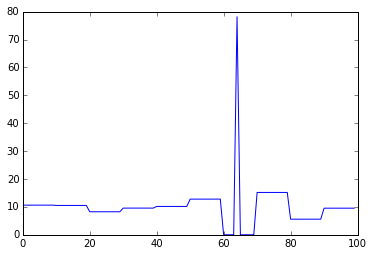

In [575]:
8

In [476]:
normalize(test,axis = 0,norm = 'l1')

array([[ 0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333]])

In [525]:
doc = np.random.randint(0, 99)
doc

38

In [526]:
EqLogTheta = digamma(per_document_prop[doc,])
EqLogTheta

array([-11.14034284,  -6.82386715, -18.52564873, -10.56980416,
       -18.56987775, -10.84146399,  -6.99618588, -11.92119262,
        -8.99771096,  -6.60550368])

In [527]:
EqLogBeta = np.apply_along_axis(digamma, axis=0, arr=topics)
EqLogBeta

array([[   -93.64239107,   -346.17046706,   -141.38920323,    -61.06998823,
           -75.83113173,   -137.0354476 ,   -103.2400431 ,    -71.66106677,
          -265.53939738,    -76.73407555],
       [   -73.02308224,    -53.99923743,    -50.58886426,   -239.73915018,
           -71.27314792,    -61.35211697,   -510.56366588,   -187.71540503,
           -50.35009266,   -104.36024762],
       [   -59.58841299,   -108.90118694,   -904.5324831 ,   -520.36230421,
           -58.26799556,   -880.91210785,   -136.5347117 ,    -78.11000822,
          -348.51607036,    -97.31642829],
       [   -93.50321547,  -1579.37815539,    -80.91497795, -12078.22624294,
           -66.02860869,   -255.0351843 ,   -138.64479117,  -1019.32940419,
           -52.04692441,   -120.76675047],
       [   -57.79618039,   -201.73035027,   -330.49496701,    -51.93309023,
          -622.28181211,    -52.02157013,    -52.7900874 ,   -139.7161414 ,
           -56.75909282,   -252.18685409],
       [   -91.55889871, 

In [375]:
EqLogBeta = np.einsum('ij,i->ij',EqLogBeta,dtm[doc,])

In [531]:
per_word_prop[doc] = normalize(np.einsum('ij,i->ij',np.exp((EqLogBeta+EqLogTheta)),dtm[doc,:]),axis=0, norm='l1')

In [532]:
per_document_prop[doc,:] = normalize([alpha + np.dot(per_word_prop[doc][:,k],dtm[doc,:]) for k in range(int(ntopic))],axis=1, norm='l1')
per_document_prop[doc,:]

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [280]:
temp_topics = nu + ndoc*np.einsum('ij,i->ij',per_word_prop[doc],dtm[doc,])
temp_topics

array([[  1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02],
       [  1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02],
       [  1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02],
       [  1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02],
       [  1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
          1.00000000e-02

In [281]:
t+=1
topics = normalize((1-rho(tau,kappa,t))*topics + rho(tau,kappa,t)*temp_topics,axis=1,norm='l1')
topics

array([[ 0.07601022,  0.13361029,  0.05919172,  0.02233614,  0.07138588,
         0.13460216,  0.11903411,  0.10231628,  0.1279667 ,  0.15354649],
       [ 0.17943783,  0.17798145,  0.11033054,  0.16211731,  0.02838431,
         0.07567009,  0.03385851,  0.11635182,  0.01735798,  0.09851016],
       [ 0.10222052,  0.11117118,  0.12629293,  0.13676596,  0.12072085,
         0.07836924,  0.01528611,  0.08692337,  0.114754  ,  0.10749585],
       [ 0.01211282,  0.15653931,  0.05277318,  0.06366245,  0.06107851,
         0.15434405,  0.06530254,  0.20749234,  0.03046354,  0.19623125],
       [ 0.19373055,  0.20167546,  0.05662445,  0.11280619,  0.03772689,
         0.03697778,  0.06939972,  0.0416269 ,  0.1481325 ,  0.10129957],
       [ 0.14632519,  0.05078615,  0.10204564,  0.06575565,  0.03190126,
         0.08098528,  0.13398767,  0.20898527,  0.15295306,  0.02627483],
       [ 0.05136886,  0.17504603,  0.06732828,  0.19667703,  0.09907649,
         0.09467194,  0.06983439,  0.09784407

In [354]:
topics[:,0]

array([ 3.46938875,  3.46938866,  3.46938864,  3.46938871,  3.46938878,
        3.46938869,  3.46938873,  3.46938869,  3.46938872,  3.46938864,
        0.78376232,  0.78376236,  0.78376232,  0.78376233,  0.78376235,
        0.78376239,  0.78376237,  0.78376249,  0.78376234,  0.78376239,
        3.16115834,  3.16115827,  3.16115834,  3.16115827,  3.16115833,
        3.16115829,  3.16115827,  3.16115832,  3.16115833,  3.16115828,
        0.09141088,  0.09141085,  0.09141089,  0.09141089,  0.09141091,
        0.09141089,  0.09141086,  0.09141088,  0.09141087,  0.09141084,
        4.80668024,  4.80668019,  4.80668024,  4.80668022,  4.80668024,
        4.80668021,  4.80668024,  4.80668022,  4.80668022,  4.80668024,
        0.58497126,  0.58497126,  0.58497122,  0.5849713 ,  0.58497123,
        0.58497129,  0.58497128,  0.58497129,  0.5849712 ,  0.58497125,
        0.01313973,  0.01313972,  0.0131396 ,  0.01313971,  0.01313971,
        0.01313972,  0.01313971,  0.01313973,  0.01313973,  0.01

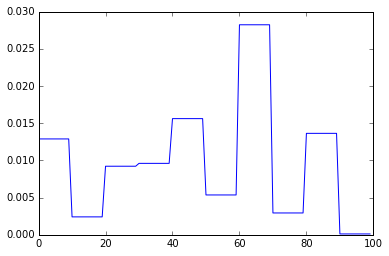

In [321]:
plt.plot(range(100),normalize((1-rho(tau,kappa,t))*topics + rho(tau,kappa,t)*temp_topics,axis=0,norm='l1')[:,1])

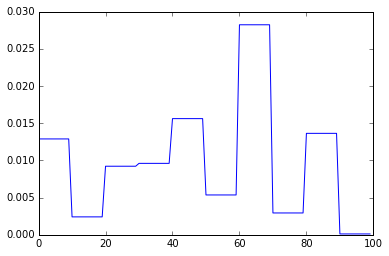

In [322]:
plt.plot(range(100),normalize((1-rho(tau,kappa,t))*topics + rho(tau,kappa,t)*temp_topics,axis=0,norm='l1')[:,0])